  # <center> Valuation of a loan </center>


$$
PV(y) = \frac{N}{(1 + y)^n} + \sum_{i = 0}^{n}\frac{c*N}{(1 + y)^i}
$$

# <center> Yield to maturity </center>

$$
PV(y) = Price \iff f(y) = \frac{N}{(1 + y)^n} + \sum_{i = 1}^{n}\frac{c*N}{(1 + y)^i} - Price = 0
$$

$$
f^{'}(y) = -100n (1 + y)^{-n -1} +  \sum_{i = 1}^{n}-iC(1 + y)^{-i -1}
$$

## <center> Root finding using Newton-Rhapson method </center>

Suppose $y_0$ is an initial guess of the root of $f(y)$, then

$$
y_1 = y_0 - \frac{f(y_0)}{f^{'}(y_0)}
$$

is the unique root of the linear approximation of $f$ at the initial guess $y_0$. Repeat the process iteratively, we have

$$
y_{n+1} = y_{n} - \frac{f(y_{n})}{f^{'}(y_{n})}
$$


In [34]:
import math
import matplotlib.pyplot as plt

class Bond:
    def __init__(self, maturity, coupon):
        self.maturity = maturity
        self.coupon = coupon
        
    # Present value of the bond
    def PV(self,y):
        sum = 100*math.pow(1 + y, -self.maturity)
        for i in range(1, self.maturity + 1):
            sum += self.coupon*math.pow(1 + y, -i)  
        return round(sum, 2)
    
    # Derivative of Present value
    def PV_derivative(self,y):
        sum = -100*self.maturity*math.pow(1 + y, -self.maturity-1)
        for i in range(1, self.maturity + 1):
            sum += -self.coupon*i*math.pow(1 + y, -i-1)  
        return round(sum, 2)
    
    # Yield to Maturity
    def YTM(self, price):
        y = 0.2
        while (round(abs(self.PV(y) - price)) > 0):
            y = y - (self.PV(y) - price )/(self.PV_derivative(y))
            print(y)
        return y     
        

In [35]:
bond = Bond(100,4)

In [52]:
price = 93
ytm = bond.YTM(price)

-0.53
-0.5252970733193778
-0.5205470066672766
-0.5157493234316682
-0.5109035419288419
-0.5060091753307598
-0.501065731589802
-0.4960727133606849
-0.4910296179193119
-0.4859359370782896
-0.48079115709881015
-0.4755947585985652
-0.47034621645531777
-0.4650449997057118
-0.45969057143884756
-0.4542823886840913
-0.44881990229251884
-0.44330255681131553
-0.4377297903503638
-0.43210103444014564
-0.4264157138799677
-0.4206732465753764
-0.4148730433634696
-0.40901450782462107
-0.4030970360789163
-0.3971200165653374
-0.3910828298014339
-0.38498484812085776
-0.378825435385721
-0.3726039466702319
-0.3663197279114726
-0.35997211552247066
-0.3535604359618657
-0.34708400525345073
-0.34054212844763143
-0.3339340990153511
-0.32725919816320587
-0.3205166940562456
-0.31370584093221765
-0.30682587808762796
-0.29987602871179597
-0.2928554985398384
-0.28576347428893856
-0.2785991218339481
-0.27136158406780325
-0.26404997837871774
-0.2566633936586821
-0.24920088673515348
-0.24166147808815783
-0.2340441466758

In [44]:
# Par value, which should be equal to the present value
pv = bond.PV(ytm)
pv

93.43

# <center> Plotting </center>

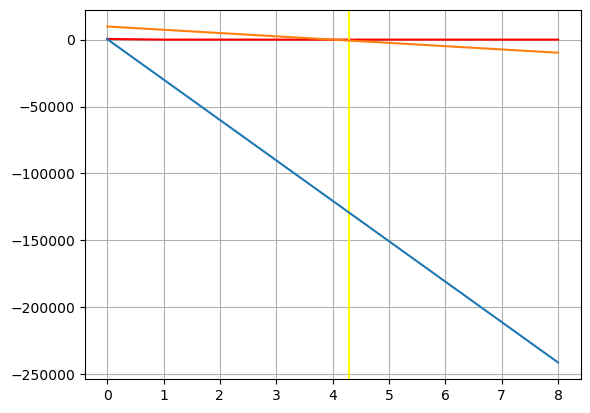

In [43]:
ir = range(9)

pvs = [ bond.PV(i) for i in ir]

tangent = [bond.PV(0) - price + i*bond.PV_derivative(0) for i in ir]
tangent4 = [bond.PV(0.04) - price + (i - 4)*bond.PV_derivative(0.04) for i in ir]

plt.plot(ir, pvs, color ="red")
plt.grid(True)
plt.axvline(x = ytm*100, color = "yellow")
plt.plot(ir, tangent)
plt.plot(ir, tangent4)
plt.show()

# <center> Loan </center>

In [49]:
class Loan:
    def __init__(self, notional, redemption, ir):
        self.notional = notional
        self.redemption = redemption
        self.ir = ir
    # Future value
    def FV(self):
        return self.redemption - self.notional*(1 + self.ir)
    def PV(self):
        return self.redemption/(1 + self.ir) - self.notional

        
loan = Loan(100, 105, 0.04)
loan    

In [51]:
loan.PV(), loan.FV()

(0.9615384615384528, 1.0)